# Trafic in Paris

In this project, the data from this URL is used: 
https://opendata.paris.fr/explore/dataset/comptages-routiers-permanents/information/

With the [referential from here](https://parisdata.opendatasoft.com/explore/dataset/referentiel-comptages-routiers/information/?location=17,48.88717,2.33266&basemap=jawg.streets)

In order to get a simplest project, we use two files made from these data :  
* `referentiel-comptages-routiers_LIGHT.csv`, the file containing the sensors locations
* `donnees_trafic_capteurs_201801_VOK2.txt`, the file containing the records of the sensor data

## 1. Display a picture of Paris
We want to display a picture of Paris (from OpenStreetMap) which is in the`'paris_open_street_map.png` file.


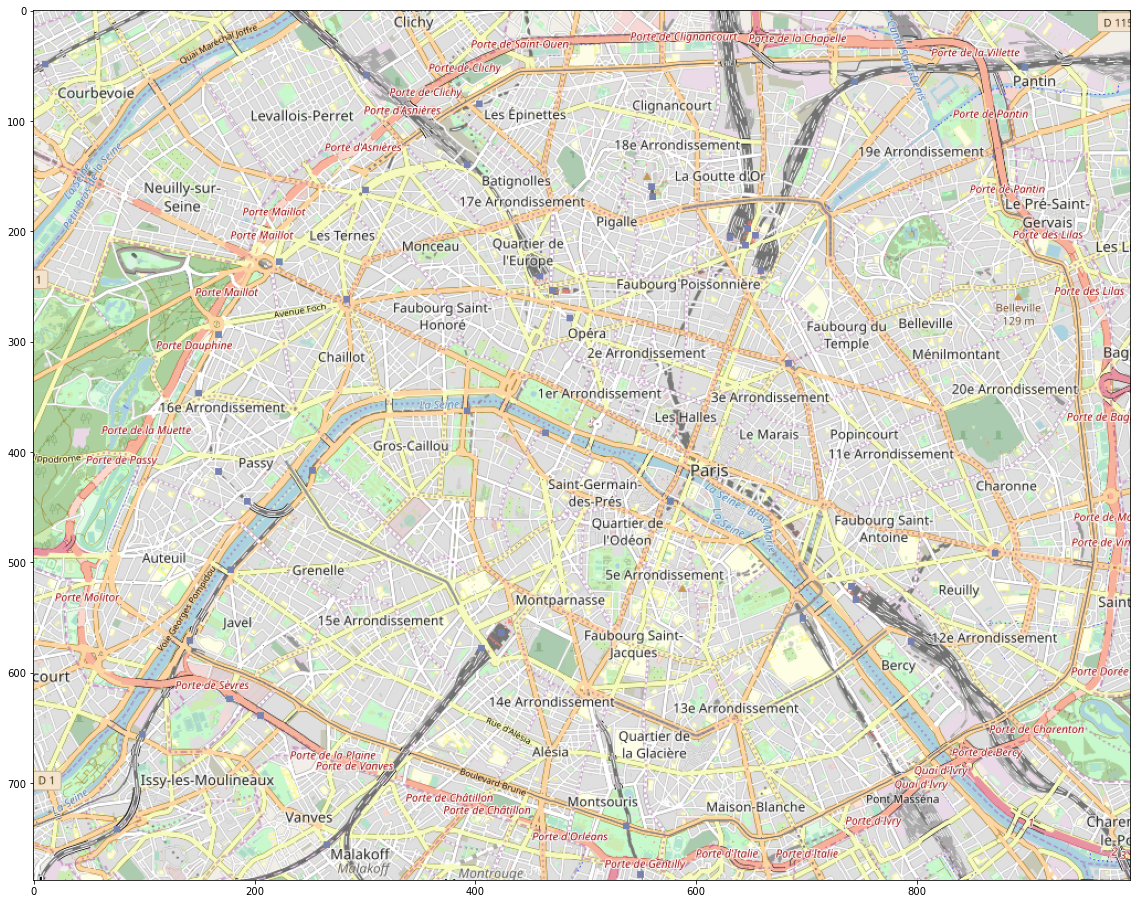

In [5]:
import numpy as np                                         
import matplotlib.pyplot as plt                            # imports

image=plt.imread('paris_open_steet_map.png')               # load the picture
fig,ax = plt.subplots(figsize=(20,16))                     # create the figure

# we put figsize= --> because the first input agument is not figsize so we name the input argument).
ax.imshow(image)                                           # CTL (display the picture in thefigure)
## We use the ax.imshow function to display the picture



## 2. Trafic sensor locations
Open the `referentiel-comptages-routiers_LIGHT.csv` file and load the data in a numpy array with the `open` and `np.genfromtxt` functions : 


In [6]:

fid = open('referentiel-comptages-routiers_LIGHT.csv') # We open the file and create the file descriptor "fid" (stream)
idll = np.genfromtxt(fid,delimiter=',',skip_header=1 ) # We read file and put the content in a numpy array
                                                       # We use delimiter, because it is comma and not  
                                                       # We use skip_header, because the columns have a name in
                                                       # the line
fid.close()                                            # We then close the file

print(idll.shape)     # Shape of th numpy array (lines and columns )
print(idll[:10])       # First 4 lines of idll

# first in the result = latitude (North-South) and the second the longitude (East-West)

(3311, 3)
[[ 1.         48.85983846  2.33424182]
 [ 2.         48.85937543  2.33645131]
 [ 3.         48.85901908  2.33978161]
 [ 3.         48.85913364  2.33877566]
 [ 4.         48.85874747  2.34113353]
 [ 4.         48.85847932  2.34247572]
 [ 5.         48.85821383  2.34344727]
 [ 6.         48.85774647  2.34506171]
 [ 7.         48.85735496  2.34644796]
 [ 8.         48.85693808  2.34801376]]


### 2.1 Plot sensor location on picture : convert latitude and longitude into pixels
We want to convert lattitude and longitude into pixel, knowing that :
* x axis (horizontal) is the second dimension when you load the picture
* y axis (vertical) is the first dimension when you load the picture
* the upper left corner of the picture is pixel (0,0) AND its longitude and latitude are 2.24641 , 48.90349
* and bottom-right corner longitude and latitude are  2.41670 , 48.81483

**Find the index of pixel of the bottom-right corner**

In [7]:
print(image)
type(image)
print(image.shape) #y-axis, x-axis, picture so you have to know the color of each pixel and the color is in 
#general in three dimensions, three colors: red, blue, green --> and you always have 1 more so 4)

#we are only interested in the first 2 numbers so: 

x_bot_right=image.shape[1]-1 # the first index is zero so -1.
y_bot_right=image.shape[0]-1 # the first index is zero so -1.

[[[0.8784314  0.8745098  0.8745098  1.        ]
  [0.8784314  0.8745098  0.8745098  1.        ]
  [0.8784314  0.8745098  0.8745098  1.        ]
  ...
  [0.6745098  0.7921569  0.69803923 1.        ]
  [0.6666667  0.6666667  0.6666667  1.        ]
  [0.73333335 0.5882353  0.30980393 1.        ]]

 [[0.8784314  0.8745098  0.8745098  1.        ]
  [0.8784314  0.8745098  0.8745098  1.        ]
  [0.8784314  0.8745098  0.8745098  1.        ]
  ...
  [0.6156863  0.77254903 0.5803922  1.        ]
  [0.7176471  0.5529412  0.21960784 1.        ]
  [0.9411765  0.7921569  0.5803922  1.        ]]

 [[0.8784314  0.8745098  0.8745098  1.        ]
  [0.8784314  0.8745098  0.8745098  1.        ]
  [0.8784314  0.8745098  0.8745098  1.        ]
  ...
  [0.80784315 0.7137255  0.5647059  1.        ]
  [0.80784315 0.7137255  0.5647059  1.        ]
  [0.80784315 0.7137255  0.5647059  1.        ]]

 ...

 [[0.89411765 0.89411765 0.8901961  1.        ]
  [0.83137256 0.827451   0.827451   1.        ]
  [0.99607

**Complete the code below** and compute the parameters for conversion from latitude and longitude into pixel

In [9]:
#upper left corner because this is the starting point of the thing (see picture)
#x-axis is longitude and y-axis is latitude in this, even though in real life it is the opposite


# Conversion from latitude and longitude into pixel
# Conversion upper-left                             0,0   :  2.24641,48.90349
#           bottom-right    x_bot_right, y_bot_right      :  2.41670,48.81483
long_init = 2.24641        # the longitude of the upper left corner 
lat_init = 48.90349         # the latitude of the upper left corner 
x_fac = x_bot_right/(2.41670-long_init)            # multiplication factor to convert longitude degree to pixel                    
y_fac = y_bot_right/(48.81483-lat_init)            # multiplication factor to convert latitude degree to pixel                    


### 2.2 Plot the first sensor location on the map

**Complete the code below** in using the conversion from latitude and longitude into pixel we find above

In [10]:
%matplotlib qt         
# tells Python to display the picture in a new window
import time

# Map display
paris = plt.imread('paris_open_steet_map.png')
fig,ax = plt.subplots(figsize=(20,16))
ax.imshow(paris)

plt.show()  ### force the display

long1 =  idll[0,2]                   ## longitude of the first sensor
lat1  =  idll[0,1]                   ## latitude of the first sensor
xdata = (long1- long_init)*x_fac  # convert longitude in pixel 
ydata = (lat1 - lat_init)*y_fac  # convert latitude in pixel
line, = ax.plot(xdata, ydata, 'ro')  # store the line id, so we can change it after
print(xdata,ydata)

####  strange lines below are needed for the display (trust me) ###########
time.sleep(0.4)
plt.pause(1e-2) # this update the plot !!!
time.sleep(0.1)
plt.pause(1e-2) # this update the plot !!!

time.sleep(8)   # wait 8 secondes
plt.close(fig)  # close the figure window : prevent crashing

512.1674563269115 387.4775743729041


### 2.3 Plot sequentially the first 20 sensor locations

**Complete the code below**

In [11]:
%matplotlib qt  
display_speed = 2

# Map display
paris = plt.imread('paris_open_steet_map.png')
fig,ax = plt.subplots(figsize=(20,16))
ax.imshow(paris)

plt.show()   ### force the display

xdata = []    # begin with empty data
ydata = []    # begin with empty data
line, = ax.plot(xdata, ydata, 'ro') # store the line id, so we can change it after
 
for i in range(20):
    plt.title("Sensor "+str(i))
    xdata = (idll[i,2]- long_init)*x_fac  # convert longitude in pixel
    ydata = (idll[i,1]- lat_init)*y_fac  # convert latitude in pixel
    line.set_xdata(xdata)  # change the line dot x values
    line.set_ydata(ydata)  # change the line dot y values
    plt.pause(1e-3)        # this update the plot !!!
    time.sleep(1/display_speed) # wait : slow down the plot in order to see it

plt.close(fig) # close the figure window

## 3. Traffic data
The cell below loads a short version of data (it takes a few seconds)

In [12]:
%%time
print("Loading : wait a few seconds ...")
fid = open('donnees_trafic_capteurs_201801_VOK2.txt') # open the file
## Load the data  dtype input argument of genfromtxt gives the rigth types :
## Colomns in order : i8 means integer, S10 means string of 10 chars, S2:string of 2 chars, i8:integer, 
##f8:float
sens_data = np.genfromtxt(fid,delimiter=',',
                          dtype=[("sens_id","i8"),('day',"S10"),
                                 ("hour","S2"),("car_n","i8"),("rate","f8")])
fid.close()
print("Loaded.")


Loading : wait a few seconds ...
Loaded.
Wall time: 19.6 s


In [13]:
print(type(sens_data))
print(sens_data.shape)       # the shape of the data : one dimension but each element is tuple
print((sens_data[0]))
print(sens_data[:4])         # display the four first elements
# each row is a 5 element tuple : b'2018-01-01' is a "byte string",
# use str(b'2018-01-01','utf-8') to convert it in "standard string"

print(int(sens_data[0][2]))  # we can convert time column value into integer
print(np.nanmax(sens_data['rate'])) # we can access only on column with its name, with this syntax.


<class 'numpy.ndarray'>
(2207989,)
(1, b'2018-01-01', b'01', 1915, 8.4)
[(1, b'2018-01-01', b'01', 1915, 8.4) (1, b'2018-01-01', b'02', 2111, 8.8)
 (1, b'2018-01-01', b'03', 1971, 8.5) (1, b'2018-01-01', b'04', 1864, 6.6)]
1
94.1


### 3.1 Plot the sensor where "traffic rate" is max for the entire file


In [14]:
%matplotlib qt
ind_max = np.nanargmax(sens_data['rate'])          # row index of sens_data where the rate is max : CTL USING
                                                   #  np.nanargmax 
sens_id_max = sens_data[ind_max]["sens_id"]  #sens_id_max : sensor id where the rate is max : CTL

## Sensor ID are in idll (column 0) 
ind_cap = idll[:,0]==sens_id_max # indexes (boolean array) in idll where are sensor id is sens_id_max  : CTL 

sens_ref_line = idll[ind_cap][0] # line where are latitude and longitude of the sensor sens_id_max : CTL
                 ### BEWARE [0] is needed because there might be two lines for one sens_id !!!!

print(sens_ref_line)

xdata = (sens_ref_line[2]-long_init)*x_fac            # x pixel value of the sensor : CTL
ydata = (sens_ref_line[1]-lat_init)*y_fac            # y pixel value of the sensor : CTL 

# Map display
paris = plt.imread('paris_open_steet_map.png')
fig,ax = plt.subplots(figsize=(20,16))
ax.imshow(paris)

plt.show() ### force the display

line, = ax.plot(xdata, ydata, 'ro') # store the line id, so we can change it after

####  strange lines below are needed for the display (trust me) ###########
time.sleep(0.4)
plt.pause(1e-2) # this update the plot !!!
time.sleep(0.2)
plt.pause(1e-2) # this update the plot !!!
time.sleep(5)

plt.close(fig)

[4.49700000e+03 4.88683816e+01 2.28213023e+00]


### 3.2 Plot the sensor location where the "traffic rate" is max on January the 4th 2018
**Complete the code below**

In [16]:
sens_data_1day = sens_data['day']==b'2018-01-04'  ### Select data where date is 2018-01-04  : CTL
sens_data_1day = sens_data[sens_data_1day]
print(sens_data_1day)

### SAME computing as the previous question (except using sens_data_1day instead of sens_data)
ind_max = np.nanargmax(sens_data_1day['rate'])# row index of sens_data where the rate is max:CTLwith np.nanarmax 
sens_id_max = sens_data_1day[ind_max]["sens_id"]# sens_id_max : sensor id where the rate is max : CTL
## Sensor ID are in idll (column 0) 
ind_cap = idll[:,0]==sens_id_max         # indexes in idll where are sensor id is sens_id_max  : CTL
sens_ref_line = idll[ind_cap][0]     # line where are latitude and longitude of the sensor  : CTL
                        ### BEWARE [0] is neeeded because there might be two lines for one sens_id !!!!

xdata =  (sens_ref_line[2]-long_init)*x_fac         # x pixel value of the sensor : CTL
ydata = (sens_ref_line[1]-lat_init)*y_fac           # y pixel value of the sensor : CTL 

[(   1, b'2018-01-04', b'00', 1723, 6.2)
 (   1, b'2018-01-04', b'01', 1146, 4.2)
 (   1, b'2018-01-04', b'02',  761, 2.5) ...
 (7026, b'2018-01-04', b'21',   -1, nan)
 (7026, b'2018-01-04', b'22',   -1, nan)
 (7026, b'2018-01-04', b'23',   -1, nan)]


### 3.3 Plot sequentially for each day the sensor location where the "traffic rate" is max 
Run the cell below in order to Load the whole dataset from the file named `donnees_trafic_capteurs_201801_VOK2.txt`. Then **complete the code** of the next cell and plot sequentially for each day the sensor location where the "traffic rate" is maxx

In [17]:
%%time 
print("Loading : wait a few seconds ...")
fid = open('donnees_trafic_capteurs_201801_VOK2.txt') # open the file
## Load the data  dtype input argument of genfromtxt gives the rigth types :
## Colomns in order : i8 means integer, S10 means string of 10 chars, S2:string of 2 chars, i8:integer, f8:float
sens_data = np.genfromtxt(fid,delimiter=',',dtype=[("sens_id","i8"),('day',"S10"),("hour","S2"),
                                                   ("car_n","i8"),("rate","f8")])
fid.close()
print("Loaded.")

Loading : wait a few seconds ...
Loaded.
Wall time: 20.1 s


In [18]:
%matplotlib qt

display_speed = 1.5
xdata = []
ydata = []

# Map display
paris = plt.imread('paris_open_steet_map.png')
fig,ax = plt.subplots(figsize=(20,16))
ax.imshow(paris)

plt.show()

line, = ax.plot(xdata, ydata, 'ro')
 
for day in np.unique(sens_data['day']) :
    sens_data_1day = sens_data[sens_data['day']== day]                       # select the data of the current day : COMPLETE THIS LINE
    ind_max =   np.nanargmax(sens_data_1day['rate'])                # row index of sens_data_1day where the rate is max : COMPLETE THIS LINE
    sens_id_max = sens_data_1day['sens_id'][ind_max]                 # sens_id_max : sensor id where the rate is max : COMPLETE THIS LINE
    ind_cap =   idll[:,0] == sens_id_max             # indexes in idll where are sensor id is sens_id_max  : COMPLETE THIS LINE
    sens_ref_line =   idll[ind_cap][0]        # line where are latitude and longitude of the sensor  : COMPLETE THIS LINE
    xdata =   (sens_ref_line[2]-long_init)*x_fac          # x pixel value of the sensor : COMPLETE THIS LINE 
    ydata =   (sens_ref_line[1]-lat_init)*y_fac                                                                    #### COMPLETE THIS LINE ####
 
    plt.title("DATE : "+str(day,'utf-8'))
    line.set_xdata(xdata)
    line.set_ydata(ydata)
    
    plt.pause(1e-3) # this update the plot !!!
    time.sleep(1/display_speed) 

plt.close(fig)

### 3.4  Plot sequentially the sensor locationS where "traffic rate" is over 50%, for each day 

**Complete the code below**

In [ ]:
%matplotlib qt
display_speed = 1.5
xdata = []
ydata = []

# Map display
paris = plt.imread('paris_open_steet_map.png')
fig,ax = plt.subplots(figsize=(20,16))
ax.imshow(paris)

plt.show()

rate_threshold = 50

line, = ax.plot(xdata, ydata, 'ro')
 
for day in np.unique(sens_data['day']) :
    sens_data_1day = sens_data[sens_data['day']== day ]  # select the data of the current day
    ind_big = sens_data_1day['rate']>rate_threshold                 # row index of sens_data_1day where the rate is max
    sens_id_big = np.unique(sens_data_1day['sens_id'][ind_big])                 # sens_id_max : sensor id where the rate is max 
    ind_cap = np.isin(idll[:,0],sens_id_big)               # indexes in idll where are sensor id is sens_id_max 
    sens_ref_line =  idll[ind_cap][0]       # line where are latitude and longitude of the sensor
    xdata = (sens_ref_line[2]- long_init)*x_fac  # x pixel value of the sensor
    ydata = (sens_ref_line[1]- lat_init)*y_fac                                                             
 
    plt.title("DATE : "+str(day,'utf-8'))
    line.set_xdata(xdata)
    line.set_ydata(ydata)
    
    plt.pause(1e-3) # this updates the plot !!!
    time.sleep(1/display_speed) 

plt.close(fig)

In [36]:
print (sens_data)

[(   1, b'2018-01-01', b'01', 1915, 8.4)
 (   1, b'2018-01-01', b'02', 2111, 8.8)
 (   1, b'2018-01-01', b'03', 1971, 8.5) ...
 (7034, b'2018-01-31', b'21',  501, 2.8)
 (7034, b'2018-01-31', b'22',  316, 1.6)
 (7034, b'2018-01-31', b'23',  254, 1.3)]


### 3.5 Plot sequentially the sensor locationS where "traffic rate" over 50% for each HOUR for the first 7 days of 2018

**Complete the code below**

In [21]:
%matplotlib qt
display_speed = 1.5
xdata = []
ydata = []

# Map display
paris = plt.imread('paris_open_steet_map.png')
fig,ax = plt.subplots(figsize=(20,16))
ax.imshow(paris)

plt.show()

rate_threshold = 50

line, = ax.plot(xdata, ydata, 'ro')
for day in np.unique(sens_data['day']) :
    if day ==  b'2018-01-08': 
        break
     
    for hour in np.unique(sens_data['hour']) :
        sens_data_1hour = sens_data[sens_data['hour']== hour ]  # select the data of the current day 
        ind_big = sens_data_1hour['rate']>rate_threshold                 # row index of sens_data_1day where the rate is max 
        sens_id_big = np.unique(sens_data_1hour['sens_id'][ind_big])                 # sens_id_max : sensor id where the rate is max 
        ind_cap = np.isin(idll[:,0],sens_id_big)               # indexes in idll where are sensor id is sens_id_max  
        sens_ref_line =  idll[ind_cap][0]       # line where are latitude and longitude of the sensor  
        xdata = (sens_ref_line[2]- long_init)*x_fac  # x pixel value of the sensor
        ydata = (sens_ref_line[1]- lat_init)*y_fac                                                             
     
        plt.title("DATE : "+str(day,'utf-8')+" HOUR:"+str(hour,'utf-8'))
        line.set_xdata(xdata)
        line.set_ydata(ydata)
        
        plt.pause(1e-3) # this update the plot !!!
        time.sleep(1/display_speed) 

plt.close(fig)

<ipython-input-21-267d9c7afb5b>:22: RuntimeWarning: invalid value encountered in greater
  ind_big = sens_data_1hour['rate']>rate_threshold                 # row index of sens_data_1day where the rate is max : COMPLETE THIS LINE


KeyboardInterrupt: 